In [1]:
push!(LOAD_PATH,"./src")
using AgentModel
abm = AgentModel

using Random
using PyPlot
using Statistics
using CUDA

┌ Info: Precompiling AgentModel [top-level]
└ @ Base loading.jl:1278


# Models

## One Global parameter

In [13]:
#Definició del model
a = abm.Model()

# Add some parameter
updates = 
"""
w = 
if ((t_ < 0.5) || (t_ > 0.8)) 
0 
else 
g 
end 
* 3
"""
abm.addGlobal!(a,:w,updates=updates,randVar=[(:g,"Uniform",1.,7.)])

#Creació de agent based model community
com = abm.Community(a)

println("Cells in community: ", com.N_)
println("Global parameter w: ", com[:w])
com[:w] = 4.
println("Global parameter w after update: ", com[:w])

Cells in community: 1
Global parameter w: 0.0
Global parameter w after update: 4.0


### CPU

In [14]:
#Compile
abm.eval(abm.compile(a,saveRAM=true))

v = abm.evolve(com,tMax_=1,dt_=0.01);
#@benchmark abm.evolve(com,tMax_=1,dt_=0.01)

### GPU

In [15]:
#Compile
abm.eval(abm.compile(a,platform="gpu",saveRAM=true))

v = abm.evolve(com,tMax_=1,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01)

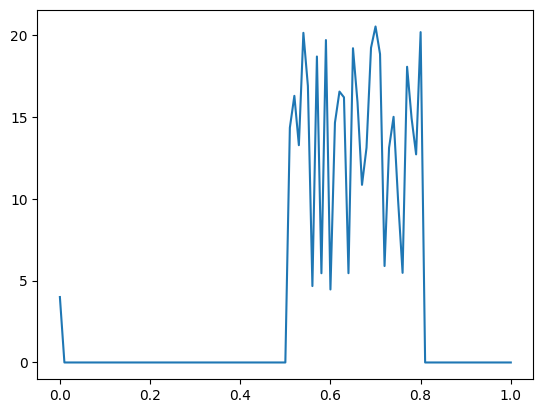

In [16]:
t=[c[:t_] for c in v]
w=[c[:w] for c in v]

plot(t,w)
show()

## Several global parameters

In [17]:
#Create the model
a = abm.Model()

#Fill the model
updates = 
"""
w = 
if ((t_ < 0.5) || (t_ > 0.8)) 
0 
else 
g 
end 
* 3
"""
abm.addGlobal!(a,[:w,:c],updates=updates,randVar=[(:g,"Uniform",1.,7.)])

#Create the cell community
com = abm.Community(a)
#Start the parameters
println("Cells in community: ", com.N_)
println("Global parameter w, c: ", com[:w], ",", com[:c])
com[:w] = 4.
com[:c] = 3.
println("Global parameter w, c after update: ", com[:w],",",com[:c])

Cells in community: 1
Global parameter w, c: 0.0,0.0
Global parameter w, c after update: 4.0,3.0


### CPU

In [18]:
#Compile
abm.eval(abm.compile(a,saveRAM=true))

v = abm.evolve(com,tMax_=1,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01)

### GPU

In [19]:
#Compile
abm.eval(abm.compile(a,platform="gpu",saveRAM=true))

v = abm.evolve(com,tMax_=1,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01)

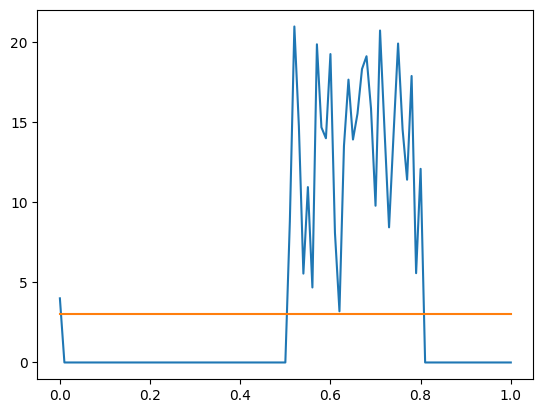

In [20]:
t=[i[:t_] for i in v]
w=[i[:w] for i in v]
c=[i[:c] for i in v]

plot(t,w)
plot(t,c)
show()

## One local parameter

In [21]:
#Create the model
a = abm.Model()

#Fill the model
updates=
"""
w += g*dt_
"""
abm.addLocal!(a,:w,updates=updates,randVar=[(:g,"Uniform",-1.,1.)])

#Create community
N = 100
com = abm.Community(a,N=N)

com[:w] = rand(N);

### CPU

In [22]:
#Compile
abm.eval(abm.compile(a,saveRAM=true))

v = abm.evolve(com,tMax_=1,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.1)

### GPU

In [23]:
#Compile
abm.eval(abm.compile(a,platform="gpu",saveRAM=true))

v = abm.evolve(com,tMax_=1,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.1)

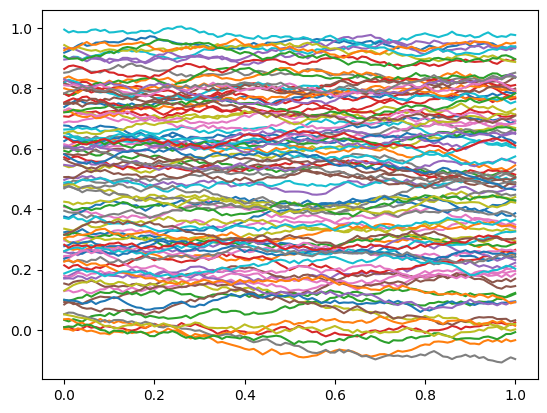

In [24]:
t=[i[:t_] for i in v]
w=[i[:w] for i in v]
w=permutedims(reshape(hcat(w...), (length(w[1]), length(w))))

plot(t,w)
show()

## Several local parameters

In [25]:
#Create the model
a = abm.Model()

#Fill the model
updates=
"""
w += g*dt_
h /= 0.011/dt_
"""
abm.addLocal!(a,[:w,:h],updates=updates,randVar=[(:g,"Uniform",-1.,1.)])

#Create community
N = 100
com = abm.Community(a,N=N)

com[:w] = rand(N);
com[:h] = 4.;

### CPU

In [26]:
#Compile
abm.eval(abm.compile(a,saveRAM=true))

v = abm.evolve(com,tMax_=1,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.01)

### GPU

In [27]:
#Compile
abm.eval(abm.compile(a,platform="gpu",saveRAM=true))

v = abm.evolve(com,tMax_=1,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.01)

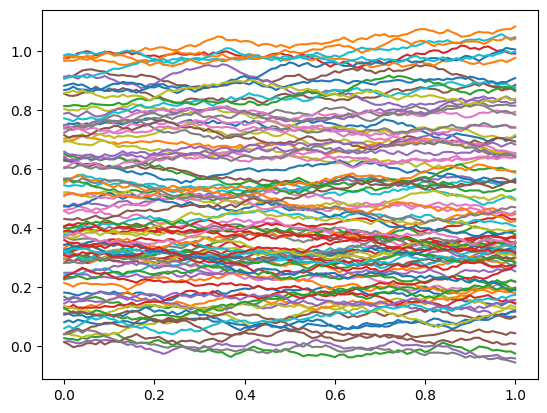

In [28]:
t=[i[:t_] for i in v]
w=[i[:w] for i in v]
w=permutedims(reshape(hcat(w...), (length(w[1]), length(w))))

plot(t,w)
show()

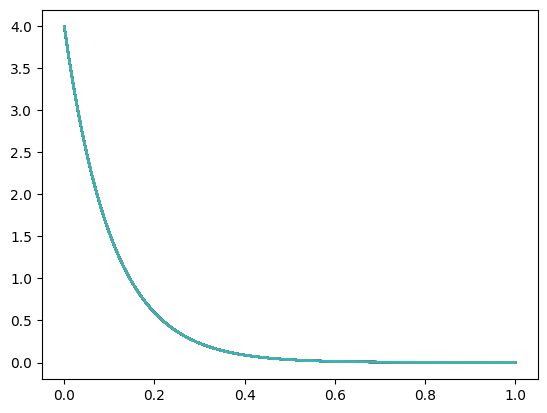

In [29]:
t=[i[:t_] for i in v]
w=[i[:h] for i in v]
w=permutedims(reshape(hcat(w...), (length(w[1]), length(w))))

plot(t,w)
show()

## One variable

In [19]:
#Create the model
a = abm.Model()

#Fill the model
eqs=
"""
dxdt = -x
"""
abm.addVariables!(a,:x,eqs)

#Create community
N = 1000
com = abm.Community(a,N=N)

com[:x] = rand(N);

### CPU

In [20]:
#Compile
abm.eval(abm.compile(a,saveRAM=true))

v = abm.evolve(com,tMax_=10,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.1)

### GPU

In [21]:
#Compile
abm.eval(abm.compile(a,platform="gpu",saveRAM=true))

v = abm.evolve(com,tMax_=10,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.1)

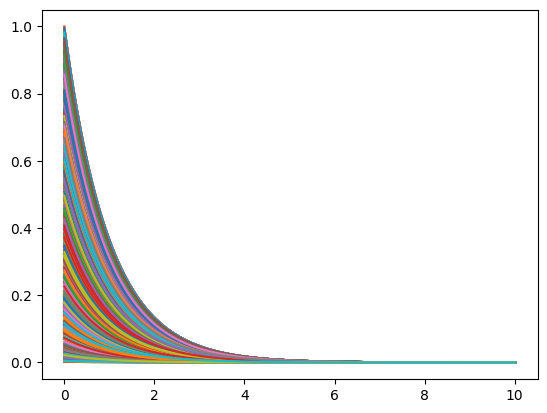

In [22]:
t=[i[:t_] for i in v]
w=[i[:x] for i in v]
w=permutedims(reshape(hcat(w...), (length(w[1]), length(w))))

plot(t,w)
show()

## Several variables

In [7]:
#Create the model
a = abm.Model()

#Fill the model
eqs=
"""
dxdt = -x
dydt = -0.1*x
"""
abm.addVariables!(a,[:x,:y],eqs)

#Create community
N = 100
com = abm.Community(a,N=N)

com[:x] = rand(N);
com[:y] = 4.;

### CPU

In [8]:
#Compile
abm.eval(abm.compile(a,saveRAM=true))

v = abm.evolve(com,tMax_=10,dt_=0.01);
#@benchmark abm.evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.1)

### GPU

In [9]:
#Compile
abm.eval(abm.compile(a,platform="gpu",saveRAM=true))

v = abm.evolve(com,tMax_=10,dt_=0.01);
#@benchmark abm.evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.1)

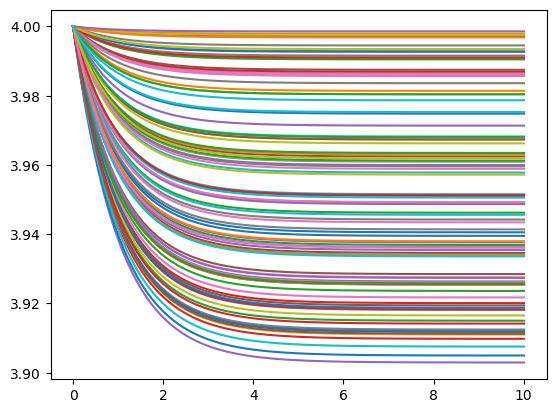

In [10]:
t=[i[:t_] for i in v]
w=[i[:y] for i in v]
w=permutedims(reshape(hcat(w...), (length(w[1]), length(w))))

plot(t,w)
show()

## One variable stochastic

In [16]:
#Create the model
a = abm.Model()

#Fill the model
eqs=
"""
dxdt = ξ_
"""
abm.addVariables!(a,:x,eqs)

#Create community
N = 1000
com = abm.Community(a,N=N)

com[:x] = 0.;

### CPU

In [17]:
#Compile
abm.eval(abm.compile(a,saveRAM=true,integrator="eulerSDEIto"))

v = abm.evolve(com,tMax_=100,dt_=0.01,tSaveStep_=0.1);
#@benchmark evolve(com,tMax_=10,dt_=0.1,tSaveStep_=0.1)

### GPU

In [18]:
#Compile
abm.eval(abm.compile(a,platform="gpu",integrator="eulerSDEIto",saveRAM=true))

v = abm.evolve(com,tMax_=100,dt_=1.,tSaveStep_=1);
#@benchmark evolve(com,tMax_=10,dt_=0.1,tSaveStep_=0.1)

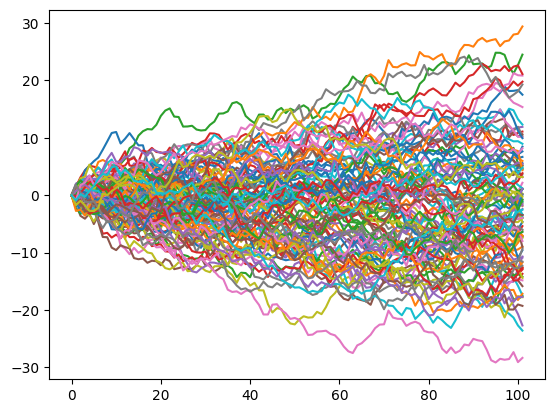

In [14]:
t=[i[:t_] for i in v]
w=[i[:x] for i in v]
w=permutedims(reshape(hcat(w...), (length(w[1]), length(w))))

plot(t,w[:,1:100])
show()

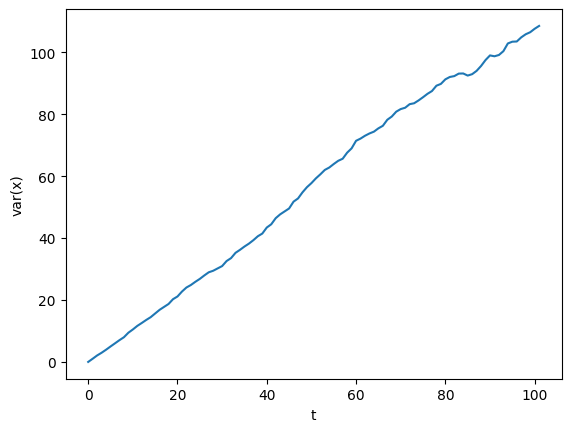

PyObject Text(24.000000000000007, 0.5, 'var(x)')

In [15]:
plot(t,std(w,dims=(2)).^2)
xlabel("t")
ylabel("var(x)")

## Several variables stochastic

In [23]:
#Create the model
a = abm.Model()

#Fill the model
eqs=
"""
dxdt = ξ_ + if x > 1.;
-100.
elseif x < -1.; 
100. 
else; 
0. 
end

dydt = ξ_ + if y > 1.;
-100.
elseif y < -1.; 
100. 
else; 
0. 
end
"""
abm.addVariables!(a,[:x,:y],eqs)

#Create community
N = 1000
com = abm.Community(a,N=N)

com[:x] = 0.;
com[:y] = 0.;

### CPU

In [24]:
#Compile
abm.eval(abm.compile(a,saveRAM=true,integrator="eulerSDEIto"))

v = abm.evolve(com,tMax_=100,dt_=0.01,tSaveStep_=0.1);
#@benchmark evolve(com,tMax_=10,dt_=0.1,tSaveStep_=0.1)

### GPU

In [25]:
#Compile
abm.eval(abm.compile(a,platform="gpu",integrator="eulerSDEIto",saveRAM=true))

v = abm.evolve(com,tMax_=100,dt_=0.01,tSaveStep_=1);
#@benchmark evolve(com,tMax_=100,dt_=0.01,tSaveStep_=50)

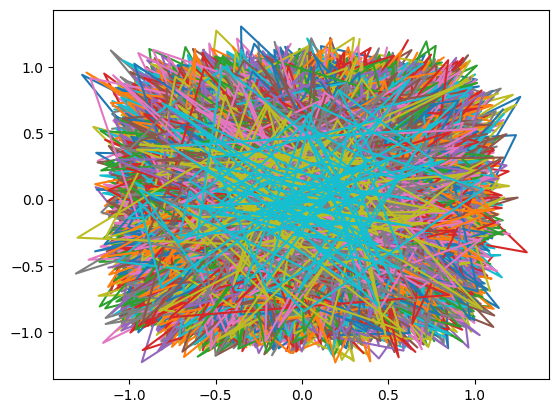

In [26]:
t=[i[:t_] for i in v]
w=[i[:x] for i in v]
w2=[i[:y] for i in v]
w=permutedims(reshape(hcat(w...), (length(w[1]), length(w))))
w2=permutedims(reshape(hcat(w2...), (length(w2[1]), length(w2))))

plot(w[:,1:1000],w2[:,1:1000])
show()

## Local interaction

In [27]:
#Create Agent model
a = abm.Model()

#Add local parameters
abm.addLocal!(a,[:x1,:x2])

interaction = 
"""
f₁ += if sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<1.; 1. else; 0. end
"""
#Add local interaction
abm.addLocalInteraction!(a,[:f],interaction)
N = 1000
com = abm.Community(a,N = N)

com[:x1] = sqrt(N)/2*rand(N).-5;
com[:x2] = sqrt(N)/2*rand(N).-5;

### CPU

In [28]:
abm.eval(abm.compile(a,platform="cpu",saveRAM=true))

LoadError: MethodError: no method matching _replace!(::Base.var"#new#267"{Tuple{Pair{String,String}}}, ::String, ::String, ::Int64)
Closest candidates are:
  _replace!(::Union{Function, Type}, !Matched::T, !Matched::T, ::Int64) where T<:Union{AbstractDict, AbstractSet} at set.jl:599
  _replace!(::Union{Function, Type}, !Matched::AbstractArray, !Matched::AbstractArray, ::Int64) at set.jl:635

In [29]:
v1 = abm.evolve(com,dt_=0.1,tMax_=10);
#@benchmark evolve(com,dt_=0.1,tMax_=1)

LoadError: ArgumentError: number of columns of each array must match (got (0, 2))

In [30]:
abm.eval(abm.compile(a,platform="cpu",neighborhood="nn",neighborhoodCondition="sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<1.",saveRAM=true))

LoadError: MethodError: no method matching compile(::AgentModel.Model; platform="cpu", neighborhood="nn", neighborhoodCondition="sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<1.", saveRAM=true)
Closest candidates are:
  compile(::AgentModel.Model; platform, integrator, saveRAM) at /home/gabriel/Documents/PhD/3 Simulation/embryogenesisJulia/src/compile/compile.jl:1 got unsupported keyword arguments "neighborhood", "neighborhoodCondition"

In [51]:
v2 = abm.evolve(com,dt_=0.1,tMax_=10);

In [52]:
v1[end][:f] == v2[end][:f]

true

In [53]:
function f(x,y)
    index = CUDA.threadIdx().x
    stride = CUDA.blockIdx().x
    
    for i in index:stride:length(x)
        x[i] = min(x)

LoadError: syntax: incomplete: "for" at In[53]:5 requires end

In [54]:
abm.eval(abm.compile(a,platform="cpu",neighborhood="nn",neighborhoodCondition="sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<1.",saveRAM=true))

LoadError: MethodError: no method matching compile(::AgentModel.Model; platform="cpu", neighborhood="nn", neighborhoodCondition="sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<1.", saveRAM=true)
Closest candidates are:
  compile(::AgentModel.Model; platform, integrator, saveRAM) at /home/gabriel/Documents/PhD/3 Simulation/embryogenesisJulia/src/compile/compile.jl:1 got unsupported keyword arguments "neighborhood", "neighborhoodCondition"

### GPU

In [55]:
abm.eval(abm.compile(a,platform="gpu",neighborhood="nn",neighborhoodCondition="sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<=1.",saveRAM=true))

LoadError: MethodError: no method matching compile(::AgentModel.Model; platform="gpu", neighborhood="nn", neighborhoodCondition="sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<=1.", saveRAM=true)
Closest candidates are:
  compile(::AgentModel.Model; platform, integrator, saveRAM) at /home/gabriel/Documents/PhD/3 Simulation/embryogenesisJulia/src/compile/compile.jl:1 got unsupported keyword arguments "neighborhood", "neighborhoodCondition"

In [56]:
v = abm.evolve(com,dt_=0.1,tMax_=0.1);
#@benchmark v = evolve(com,dt_=0.1,tMax_=1,tSave_=10.,neighMax_=50)

## Several local interaction

In [754]:
#Create Agent model
a = AgentModel()

#Add local parameters
addLocal!(a,[:x1,:x2])
addLocal!(a,[:g])

interaction = 
"""
f₁ += g₂
"""
#Add local interaction
addLocalInteraction!(a,[:f],interaction)
N = 9
com = Community(a,N = N)

com[:x1] = [-1.,0.,1.,-1.,0.,1.,-1.,0.,1.];
com[:x2] = [-1.,-1.,-1.,0.,0.,0.,1.,1.,1.];
com[:g] = ones(9)#[1.,2.,3.,4.,5.,6.,7.,8.,9.];

### CPU

In [565]:
eval(compile(a,platform="cpu",neighborhood="full",saveRAM=true))

evolve (generic function with 1 method)

In [566]:
eval(compile(a,platform="cpu",neighborhood="nn",neighborhoodCondition="sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<=1.",saveRAM=true))

evolve (generic function with 1 method)

In [755]:
eval(compile(a,platform="cpu",neighborhood="nn2",nnVariables=[:x1,:x2],radius=.49,boxSize=[[-1.,1.],[-1.,1.]],saveRAM=true))

3


evolve (generic function with 1 method)

In [756]:
compile(a,platform="cpu",neighborhood="nn2",nnVariables=[:x1,:x2],radius=.49,boxSize=[[-1.,1.],[-1.,1.]],saveRAM=true)

3


:(function evolve(com::Community; tMax_, dt_, t_ = com.t_, N_ = com.N_, nMax_ = com.N_, neighMax_ = nMax_, tSave_ = 0.0, tSaveStep_ = dt_, threads_ = 256)
      #= In[110]:64 =#
      #= In[110]:66 =#
      loc_ = Array(com.loc)
      loc_ = [loc_; zeros(nMax_ - (size(com.loc))[1], 3)]
      locInter_ = zeros(nMax_, 1)
      nnGridBinId_ = zeros(Int, nMax_)
      nnGridCounts_ = zeros(Int, 9)
      nnGridCountsAlloc_ = zeros(Int, 9)
      nnGridCountsCum_ = zeros(Int, 9)
      nnId_ = zeros(Int, nMax_)
      commRAM_ = Array{Community}([com])
      #= In[110]:68 =#
      function locInterStep_(dt_, t_, N_, locInter_, loc_, nnGridBinId_, nnGridCounts_, nnGridCountsCum_, nnId_)
          #= none:1 =#
          #= none:4 =#
          #= none:4 =# Threads.@threads for ic1_ = 1:1:N_
                  #= none:6 =#
                  locInter_[ic1_, 1] = 0
                  #= none:8 =#
                  begin
                      #= none:10 =#
                      bin = nnGridBinId_[ic1_]
 

In [746]:
com.t_=0.
#com[:x1] = [0.9];
#com[:x2] = [0.9];
v = evolve(com,dt_=0.1,tMax_=0.2);
#@benchmark evolve(com,dt_=0.1,tMax_=1)

In [747]:
v[2][:f]

9-element Array{AbstractFloat,1}:
 5.0
 6.0
 7.0
 8.0
 9.0
 8.0
 7.0
 6.0
 5.0

### GPU

In [345]:
eval(compile(a,platform="gpu",neighborhood="nn",neighborhoodCondition="sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<=1.",saveRAM=true))

evolve (generic function with 1 method)

In [156]:
v = evolve(com,dt_=0.1,tMax_=0.1);
#@benchmark v = evolve(com,dt_=0.1,tMax_=1,tSave_=10.,neighMax_=50)